<h1> $$$$ Linear Discriminant Analysis</h1>

In [98]:
# import required libraries
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import *

In [99]:
# Required DataSet
dataset = pd.read_csv("dataset.txt", sep="|", names = ['x', 'y'])


In [100]:
print(dataset)

            x  y
0    4.667798  0
1    5.509199  0
2    4.702792  0
3    5.956707  0
4    5.738622  0
5    5.027283  0
6    4.805434  0
7    4.425689  0
8    5.009369  0
9    5.116719  0
10   6.370918  0
11   2.895042  0
12   4.666842  0
13   5.602155  0
14   4.902798  0
15   5.032653  0
16   4.083973  0
17   4.875524  0
18   4.732801  0
19   5.385993  0
20  20.743935  1
21  21.417529  1
22  20.579242  1
23  20.738695  1
24  19.446054  1
25  18.363603  1
26  19.903632  1
27  19.108709  1
28  18.187876  1
29  19.717676  1
30  19.096290  1
31  20.527413  1
32  20.632056  1
33  19.862181  1
34  21.346706  1
35  20.333906  1
36  21.027149  1
37  18.275361  1
38  21.773712  1
39  20.659535  1


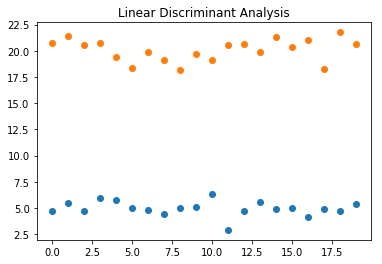

In [101]:
x1_data = []
x2_data = []

for i,j in zip(dataset['x'], dataset['y']):
    if j == 0:
        x1_data.append(i)
    else:
        x2_data.append(i)



plot(x1_data, 'o')
plot(x2_data, 'o')
title("Linear Discriminant Analysis")
show()

In [102]:

# Calculate the Class Mean

def classMean(data):
    sumVal = 0
    meanList = []
    for i in data:
        sumVal = sumVal + i
    # Calculate the mean
    meanVal = sumVal  / len (data)
    # Calculate x - mean**2
    for x in data:
        meanList.append((x - meanVal)**2)
    sumVal = sum(meanList)
    return sumVal, meanVal;
    
        

In [103]:
# Class Mean for X , Y = 0
classMeanValForX1, meanValX1 = classMean(x1_data)
print(classMeanValForX1, meanValX1)

10.1582301317 4.975415507


In [104]:
# Class Mean for X , Y = 1
classMeanValForX2, meanValX2 = classMean(x2_data)
print(classMeanValForX2, meanValX2)

21.4931670844 20.087062921


In [105]:
# Calculate the class probabilities
# Probability of y = 0 upon total number of observations for y = 0 and y = 1

def classProbability(dataset, x1_data, x2_data):
    py0 = len(x1_data)/ len(dataset['y'])
    py1 = len(x2_data)/ len(dataset['y'])
    return py0, py1

In [106]:
py0, py1 = classProbability(dataset, x1_data, x2_data)

In [107]:
print('Probablity of having 0 and 1 is : ', py0, 'and',  py1)

Probablity of having 0 and 1 is :  0.5 and 0.5


In [108]:
# Calculate the variance
def calculateVariance(classMeanValForX1, classMeanValForX2, dataset):
    return 1 / (len(dataset['x']) - 2) * (classMeanValForX1 + classMeanValForX2)

In [109]:
variance = calculateVariance(classMeanValForX1, classMeanValForX2, dataset)

In [115]:
print(variance)

0.832931505688


In [119]:
# Make prediction 
# Prediction can be made by calculating the discriminant for each class

def discriminant(mean_data, variance, probability, data):
    disc = []
    for i in data:
        disc.append(i * (mean_data/variance) - (mean_data**2) / (2 * variance) + np.log(probability))
    return disc



In [121]:
# Discriminant(Y = 0|x)
discy0 = discriminant(meanValX1, variance, py0, dataset['x'])

In [123]:
# Discriminant(Y = 1|x)
discy1 = discriminant(meanValX2, variance, py1, dataset['x'])

In [125]:
# Prediction Function 

def prediction (discy0, discy1):
    pred = []
    for x1, x2 in zip(discy0, discy1):
        if x1 > x2:
            pred.append(0)
        else:
            pred.append(1)
    return pred

In [126]:
pred_values = prediction(discy0, discy1)

In [128]:
print(pred_values)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [129]:
# Error Finding 

def findError(pred_values, y_data):
    errorList = []
    for p, y in zip(pred_values, y_data):
        if p == y:
            errorList.append(0)
        else:
            errorList.append(1)
    return errorList
        

In [130]:
errorData = findError(pred_values, dataset['y'])

In [132]:
print(errorData)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [133]:
# Accuracy Calculation 

accuracy = (1 - (sum(errorData)/len(errorData))) * 100

In [135]:
print(accuracy)

100.0
